时序模型：资金流、交通流

# 时间序列模型

- 历史悠久，在中国古代的农业社会中，人们就将一年中不同时间节点和天气的规律总结了下来，形成了二十四节气，也就是从时间序列中观察天气和太阳的规律（只是当时没有时间序列模型和相应工具）
- 时间序列：建立了观察结果与时间变化的关系，能帮预测未来一段时间内的结果变化情况


## 时间序列分析与回归分析

时间序列模型是特殊的回归模型，在选择模型前，我们需要确定结果与变量之间的关系。
- 回归分析：训练得到的是因变量y与自变量x（通常x为一个或多个，且当x为1个时与时间无关）的相关性$y=wx+b$，然后通过新的自变量x来预测因变量y  
时间序列分析：训练得到的是因变量y与时间的相关性（自变量x只能为1个，而且与时间相关）
- 回归分析：擅长的是多变量与目标结果之间的分析，即便是单一变量，也往往与时间无关  
时间序列分析：建立在时间变化的基础上，它会分析因变量的趋势、周期、时期和不稳定因素等。这些趋势和周期都是在时间维度的基础上，是我们观察的重要特征

## 时间序列的分解

- 趋势（trend）：时间序列在长时期内呈现出来的某种持续上升或持续下降的变动，也称长期趋势  
平稳序列（stationary series）：基本上不存在趋势（Trend）的序列，各观察值基本上在某个固定的水平上波动  
非平稳序列（non-stationary series）：包含趋势、季节性或周期性的序列，可以只有一种成分，也可能是多种成分的组合
![pic/stationary&non-stationary series.jpg](pic/stationary&non-stationary series.jpg)
- 季节性（seasonality）：时间序列在一年内重复出现的周期波动，比如销售旺季，销售淡季，旅游旺季、旅游淡季  
季节，可以是任何一种周期性变化，不一定是一年中的四季  
含有季节成分的序列可能含有趋势，也可能不含有趋势
- 周期性（cyclicity）：通常是由经济环境的变化引起，比如10年1次经济危机（1998年亚洲经济危机，2008年美国四大危机，2018年经济放缓）  
不同于趋势变动，不是朝着单一方向的持续运动，而是涨落相间的交替波动  
不同于季节变动，季节变动有比较固定的规律，变动周期大多为一年。周期性的循环波动无固定规律，变动周期多在一年以上，且周期长短不一
- 随机性（Irregular）：指受偶然因素影响所形成的的不规则波动，在时间序列中无法预估  
随机性是不规则波动，除去趋势、周期性、季节性的偶然性波动
![pic/TSCI.png](pic/TSCI.png)

# 机器学习模型：AR/MA/ARMA/ARIMA

## AR：Auto Regressive  自回归模型

AR：过去若干时刻的点通过线性组合（即自回归）+白噪声 = 预测未来某个时刻的点  
AR是线性时间序列分析模型中最简单的模型，通过前面部分的数据与后面部分的数据之间的相关关系来建立回归方程：
$$x_t = \Phi_t x_{t-1}+\Phi_{2} x_{t-2}+……+\Phi_{p} x_{t-p}+u_{t}$$
- $AR(p)$：$p$阶的自回归过程（当前时刻的值只与过去$p$个时刻的取值有关）  
如果只有一个时间记录点时，则为$AR(1)$，即一阶自回归过程：
$$x_t = \Phi_t x_{t-1}+u_{t}$$
- $\Phi$：自回归系数
- $u_{t}$：白噪声，时间序列中的数值的随机波动。这些波动会相互抵消，即累计为0  
日常生活环境中就存在白噪声，在数据挖掘的过程中，可以把它理解为一个期望为0，方差为常数的纯随机过程

## MA：Moving Average 移动平均模型

MA：通过前面通过将一段时间序列中白噪声序列进行加权和，可以得到移动平均方程：
$$x_t = u_{t}+\Phi_t u_{t-1}+\Phi_{2} u_{t-2}+……+\Phi_{p} u_{t-q}$$
- $MA(q)$：$q$阶移动平均过程
- $\Phi$：移动回归系数
- $u_{t}$：不同时间点的白噪声  
Xt为第t天的股票价格，而Ut为第t天的新闻影响，当天的股票价格受当天的新闻影响，也受昨天的新闻影响（但影响力要弱些，所以要乘上系数）  


- AR模型：历史时序值的线性组合来影响当前时刻点  
MA模型：历史白噪声的线性组合来影响当前时刻点
- AR和MA模型都存在阶数，在AR模型中用p表示，在MA模型中用q表示

## ARMA：Auto Regressive Moving Average 自回归移动平均模型

ARMA：结合了两个模型的特点，AR解决当前数据与后期数据之间的关系，MA则可以解决随机变动，即噪声问题，相比AR模型和MA模型，它有更准确的估计
$$x_t = u_{t}+\Phi_t u_{t-1}+\Phi_{2} u_{t-2}+……+\Phi_{p} u_{t-q}+\vartheta_t x_{t-1}+\vartheta_{2} x_{t-2}+……+\vartheta_{p} x_{t-p}$$
- $ARMA(p,q)$：ARMA模型存在$p$和$q$两个阶数

## ARIMA：Auto Regressive Integrated Moving Average  差分自回归移动平均模型/求合自回归滑动平均模型

- ARIMA模型：相比于ARMA，ARIMA多了一个差分的过程，作用是对不平稳数据进行差分平稳，在差分平稳后再进行建模
- ARIMA的原理和ARMA模型一样。相比于ARMA(p,q)的两个阶数，ARIMA是一个三元组的阶数(p,d,q)，称为ARIMA(p,d,q)模型，其中d是差分阶数

ARIMA模型步骤：
- Step1：观察时间序列数据，是否为平稳序列
- Step2：对于非平稳时间序列要先进行d阶差分运算，化为平稳时间序列
- Step3：使用ARIMA（p, d, q）模型进行训练拟合，找到最优的(p, d, q)，及训练好的模型
- Step4：使用训练好的ARIMA模型进行预测，并对差分进行还原  

ARIMA 用差分将不平稳数据先变得平稳，再用ARMA模型

### 差分

## statsmodels工具

- statsmodels工具包提供统计计算，包括描述性统计以及统计模型的估计和推断
- statsmodels主要包括如下子模块：  
回归模型：线性回归，广义线性模型，线性混合效应模  
方差分析（ANOVA）  
时间序列分析：AR，ARMA，ARIMA等

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# 步骤1：数据加载
data = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv', usecols=['Timestamp', 'Price'])
# data = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv')
# data = df[['Timestamp', 'Price']]



# 步骤2：数据处理

# 数据处理1：Timestamp（转换为时间类型）
data['Timestamp'] = pd.to_datetime(data['Timestamp']) # pd.to_datetime：将数据类型为“object”转换为时间类型“datetime”
# data.Timestamp = pd.to_datetime(data.Timestamp)
data = data.set_index('Timestamp') # set_index()：将“Timestamp”设置为索引(原Timestamp列删除)
# data.index = data.Timestamp  # 将“Timestamp”设置为索引(原Timestamp列保留)

# 数据处理2：Price（转换为数字类型）
data['Price'] = pd.to_numeric(data['Price'])  # 防止存在字符串类型的数据，即对异常数据进行处理
# data['Price'] = data['Price'].apply(pd.to_numeric, errors='ignore') 

# 数据处理3：缺失值处理 --> 线性插值（取前后数据的平均值）
data['Price'].interpolate(inplace=True)

# 步骤3：数据分解seasonal_decompose：返回三个部分 trend（趋势），seasonal（季节性）和residual (残留)
# Price = Trend + Seasonal + Residual
# freq = 288：1年内有效的数据个数
result = sm.tsa.seasonal_decompose(data['Price'], freq=288)
result.plot()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/shanghai_index_1990_12_19_to_2020_03_12.csv'

从结果可以看出，Residual的取值范围大约在[-1000, 1000]之间，而Seasonal的取值范围大约在[-50, 50]之间，因此噪声对股市的影响所占比例大约为90%（起到主导作用），这也就解释了为何股市的预测难。

AIC准则，也叫作赤池消息准则，是衡量统计模型拟合好坏的一个标准，数值越小代表模型拟合得越好

# 深度学习模型：RNN/LSTM/GRU/Transformer

# 项目1：股市走势预测

- 数据集：沪市指数的历史数据（从1990年12月19日到2020年3月12日），shanghai_index_1990_12_19_to_2020_03_12.csv
- 请你编写代码对沪市指数未来3个月（截止到2020年6月30日）的变化进行预测（将数据转化为按月统计即可）


## statsmodels工具

1. 导包：from statsmodels.tsa.arima_model import ARMA
2. 模型创建：ARMA(endog,order,exog=None)  
2.1 endog：endogenous variable，代表内生变量，又叫非政策性变量，它是由模型决定的，不被政策左右，可以说是我们想要分析的变量，或者说是我们这次项目中需要用到的变量  
2.2 order：代表是p和q的值，也就是ARMA中的阶数  
2.3 exog：exogenous variables，代表外生变量。外生变量和内生变量一样是经济模型中的两个重要变量。相对于内生变量而言，外生变量又称作为政策性变量，在经济机制内受外部因素的影响，不是我们模型要研究的变量  
ARMA(data,(7,0))，其中data是我们想要观察的变量，(7,0)代表(p,q)的阶数。
3. 模型训练：fit()函数，进行拟合
4. 模型预测：predict(start, end)函数，进行预测，其中start为预测的起始时间，end为预测的终止时间

tsa：time series analysis

## 总体思路

1. 数据加载&探索  
按照不同的时间尺度（天，月，季度，年）可以将数据压缩，得到不同尺度的数据，然后做可视化呈现。这4个时间尺度上，我们选择“月”作为预测模型的时间尺度
df_month = df.resample('M').mean()
2. 模型选择&训练，在给定范围内，选择最优的超参数  
创建ARMA时间序列模型。我们并不知道p和q取什么值时，模型最优，因此可以给它们设置一个区间范围，比如都是range(0,3)，然后计算不同模型的AIC数值，选择最小的AIC数值对应的那个ARMA模型
3. 模型预测，可视化呈现  
用这个最优的ARMA模型预测未来3个月的沪市指数走势，并将结果做可视化呈现。

## 代码实现（ARMA模型）

### 导包

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar

warnings.filterwarnings('ignore')

### 数据加载

In [24]:
# 读取数据的2种方式
df = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv', usecols=['Timestamp', 'Price'])
# df = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv')
# df = df[['Timestamp', 'Price']]

# 数据类型转换的3种方式
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df.Timestamp = pd.to_datetime(df.Timestamp)
# df['Timestamp'] = df['Timestamp'].apply(pd.to_datetime, errors='ignore')

# 设置索引的2种方式
df = df.set_index('Timestamp')
# df.index = df.Timestamp

print(df.head())

             Price
Timestamp         
1990-12-19   99.98
1990-12-20  104.39
1990-12-21  109.13
1990-12-24  114.55
1990-12-25  120.25


### 数据探索

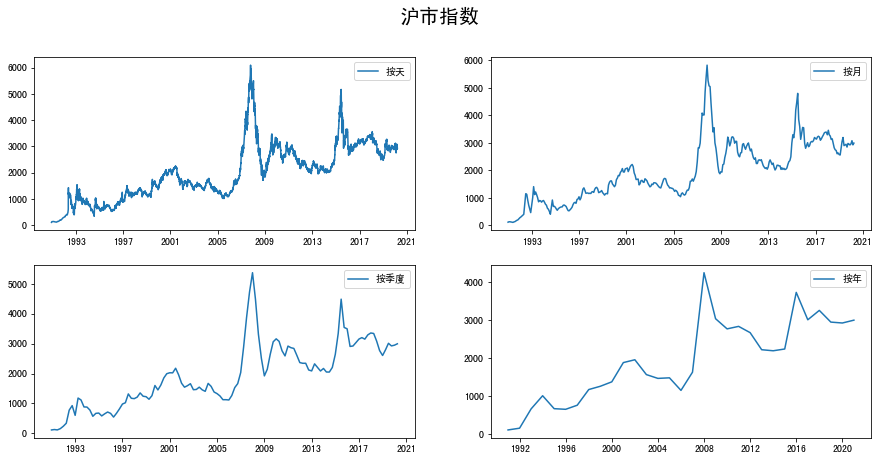

In [25]:
# 按照月，季度，年来统计
df_M = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_Y = df.resample('A-DEC').mean()


# 按照天，月，季度，年来显示沪市指数的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('沪市指数', fontsize=20)

plt.subplot(221)
plt.plot(df.Price, '-', label='按天')
plt.legend()

plt.subplot(222)
plt.plot(df_M.Price, '-', label='按月')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Price, '-', label='按季度')
plt.legend()

plt.subplot(224)
plt.plot(df_Y.Price, '-', label='按年')
plt.legend()

plt.show()

In [26]:
help(df.resample)

Help on method resample in module pandas.core.generic:

resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None) method of pandas.core.frame.DataFrame instance
    Convenience method for frequency conversion and resampling of time
    series.  Object must have a datetime-like index (DatetimeIndex,
    PeriodIndex, or TimedeltaIndex), or pass datetime-like values
    to the on or level keyword.
    
    Parameters
    ----------
    rule : string
        the offset string or object representing target conversion
    axis : int, optional, default 0
    closed : {'right', 'left'}
        Which side of bin interval is closed. The default is 'left'
        for all frequency offsets except for 'M', 'A', 'Q', 'BM',
        'BA', 'BQ', and 'W' which all have a default of 'right'.
    label : {'right', 'left'}
        Which bin edge label to label bucket with. The default is 'left'
        f

### 模型创建&训练

#### product函数

```Python
from itertools import product
```
product(*iterables, repeat=1)：输入可迭代项的笛卡尔积

- product(A, B) = ((x,y) for x in A for y in B)  
product('ab', range(3)) --> ('a',0) ('a',1) ('a',2) ('b',0) ('b',1) ('b',2)
-  product(A, repeat=4) = product(A, A, A, A)  
product((0,1), (0,1), (0,1)) --> (0,0,0) (0,0,1) (0,1,0) (0,1,1) (1,0,0) ...

- 量化交易：关注短时间的变化趋势
- 价值投资：关注长时间的变化趋势

In [27]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)  # [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 初始化擂主：正无穷
for param in parameters_list:  # 寻找超参数：网格搜索（笛卡尔积）
    try:
        model = ARMA(df_M['Price'],order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
        
    # 打擂法
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# print(results)

参数错误: (0, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  352
Model:                     ARMA(2, 2)   Log Likelihood               -2290.943
Method:                       css-mle   S.D. of innovations            161.347
Date:                Sat, 02 Jan 2021   AIC                           4593.887
Time:                        13:50:02   BIC                           4617.069
Sample:                    12-31-1990   HQIC                          4603.112
                         - 03-31-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1888.5396    497.496      3.796      0.000     913.466    2863.613
ar.L1.Price     0.4820      0.129      3.726      0.000       0.228       0.736
ar.L2.Price     0.4832      

In [28]:
help(product)

Help on class product in module itertools:

class product(builtins.object)
 |  product(*iterables, repeat=1) --> product object
 |  
 |  Cartesian product of input iterables.  Equivalent to nested for-loops.
 |  
 |  For example, product(A, B) returns the same as:  ((x,y) for x in A for y in B).
 |  The leftmost iterators are in the outermost for-loop, so the output tuples
 |  cycle in a manner similar to an odometer (with the rightmost element changing
 |  on every iteration).
 |  
 |  To compute the product of an iterable with itself, specify the number
 |  of repetitions with the optional repeat keyword argument. For example,
 |  product(A, repeat=4) means the same as product(A, A, A, A).
 |  
 |  product('ab', range(3)) --> ('a',0) ('a',1) ('a',2) ('b',0) ('b',1) ('b',2)
 |  product((0,1), (0,1), (0,1)) --> (0,0,0) (0,0,1) (0,1,0) (0,1,1) (1,0,0) ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /

### 模型预测

#### 日历模块calendar.monthrange 获取某一个月有多少天

代码实现：
```Python
import calendar
monthRange = calendar.monthrange(2018, 10)
print monthRange 
```
输出结果：
```Python
(0, 31)
```
输出的是一个元组；
- 第一个元素：数字0是这个月的第一天是星期天（上一个月的最后一天为星期几(0-6)）,星期天为0；
- 第二个元素：数字31是这个月的天数；

                  Price     forecast
1990-12-31   116.990000          NaN
1991-01-31   132.628182   138.832889
1991-02-28   131.887778   167.368332
1991-03-31   126.011429   161.448826
1991-04-30   118.426818   147.478669
1991-05-31   109.897727   145.974762
1991-06-30   126.269000   134.010482
1991-07-31   137.163043   159.718600
1991-08-31   161.263182   170.447004
1991-09-30   185.410952   193.478371
1991-10-31   200.578095   222.686873
1991-11-30   239.776667   229.844746
1991-12-31   278.112727   278.772692
1992-01-31   305.505455   318.841532
1992-02-29   337.000000   335.596041
1992-03-31   375.736818   372.152123
1992-04-30   403.274091   413.404470
1992-05-31   777.985000   434.253013
1992-06-30  1152.903636   931.356040
1992-07-31  1128.893043  1317.863837
1992-08-31   914.871429  1084.493007
1992-09-30   731.950000   834.383002
1992-10-31   601.277000   708.521233
1992-11-30   464.921905   577.879992
1992-12-31   734.386957   442.262192
1993-01-31  1010.771111   857.042316
1

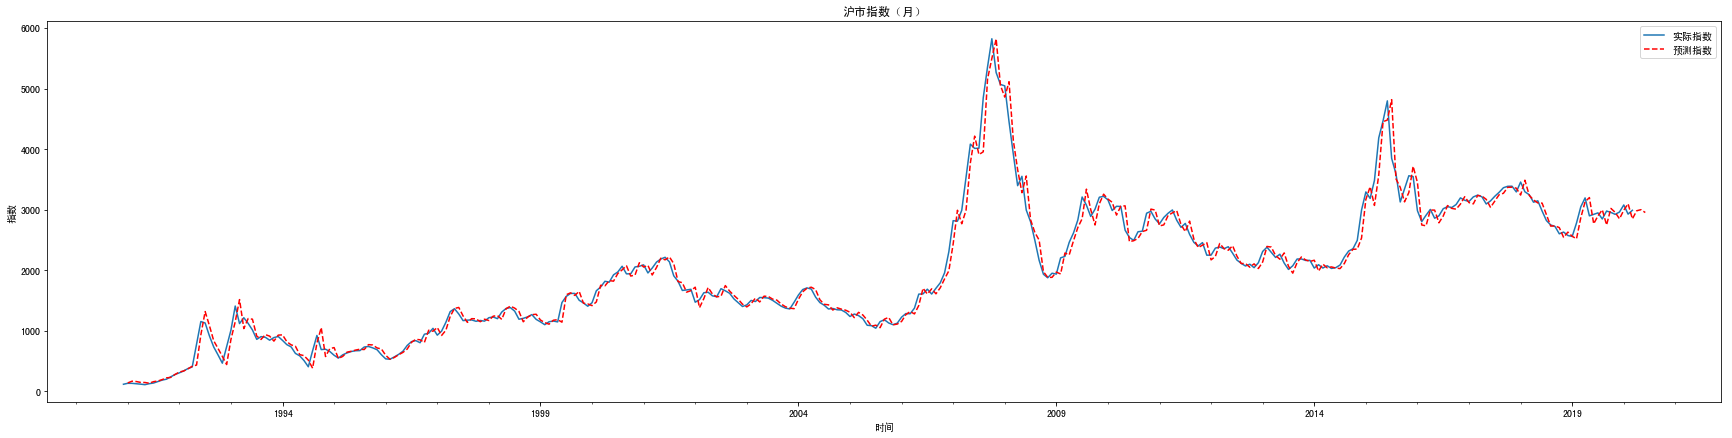

In [29]:
# 步骤1：设置future_month，需要预测的时间date_list
future_month = 3
last_month = pd.to_datetime(df_M.index[len(df_M)-1])  # 2020-03-31 00:00:00
date_list = []

for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year     # 2020
    month = last_month.month   # 3
    if month == 12:
        month = 1
        year = year + 1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]   # 30  31  30
    last_month = last_month + timedelta(days=next_month_days) # 2020-04-30 00:00:00  2020-05-31 00:00:00  2020-06-30 00:00:00
    date_list.append(last_month)
# print('date_list=', date_list)
# date_list= [Timestamp('2020-04-30 00:00:00', freq='M'), 
#             Timestamp('2020-05-31 00:00:00', freq='M'), 
#             Timestamp('2020-06-30 00:00:00', freq='M')]



# 步骤2：添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_M.columns)
df_M = pd.concat([df_M, future]) 
# 从最早日期 1990-12-19 到现在
df_M['forecast'] = best_model.predict(start=0, end=len(df_M))
# 第一个元素不正确，设置为NaN
df_M['forecast'][0] = np.NaN
print(df_M)


# 步骤3：沪市指数预测结果显示
plt.figure(figsize=(30,7))
df_M['Price'].plot(label='实际指数')
df_M['forecast'].plot(color='r', ls='--', label='预测指数')
plt.legend()
plt.title('沪市指数（月）')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()

从结果看似模型的预测效果很好，但是实际上这个模型已经过拟合了。
- 为什么股票在训练过程中容易过拟合呢？
- 原因1：噪声多  
股市训练集中的数据噪声所占比例高达90%，数据本身不可控、难以预测，所以模型在训练的过程中
- 原因2：  
时间序列模型是使用过去数据进行线性组合来预测下一时刻，假设如果过去股市的走势一直上升，那么模型预测下一时刻的股市也会上升；但是实际上并非如此，比如发生新冠肺炎等非政策性因素时，这些噪音并不会立即反映到模型中，只有当其成为历史数据时才能被模型拟合

上述使用ARMA模型（无差分，希望数据为平稳数据）实现，但是股市数据属于非平稳数据，因此最好实现模型应该是ARIMA模型。

## 代码实现（ARIMA模型）

注：ARIMA&ARMA模型整体代码一致，不同之处在下面会重点标注。

### 导包（稍微不同）

In [30]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA  #  不一样 
import statsmodels.api as sm  # 不一样
import warnings
from itertools import product
from datetime import datetime, timedelta
import calendar

warnings.filterwarnings('ignore')

### 数据加载（完全一样）

In [31]:
# 读取数据的2种方式
df = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv', usecols=['Timestamp', 'Price'])
# df = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv')
# df = df[['Timestamp', 'Price']]

# 数据类型转换的3种方式
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df.Timestamp = pd.to_datetime(df.Timestamp)
# df['Timestamp'] = df['Timestamp'].apply(pd.to_datetime, errors='ignore')

# 设置索引的2种方式
df = df.set_index('Timestamp')
# df.index = df.Timestamp

print(df.head())

             Price
Timestamp         
1990-12-19   99.98
1990-12-20  104.39
1990-12-21  109.13
1990-12-24  114.55
1990-12-25  120.25


### 数据探索（完全一样）

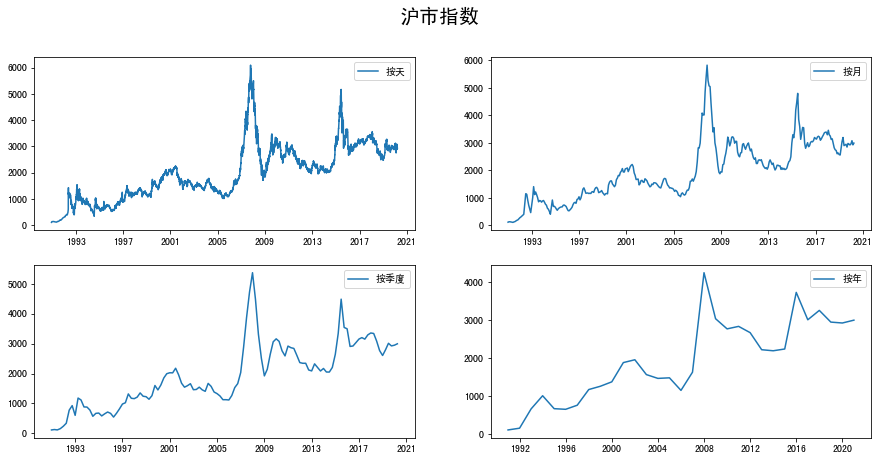

In [32]:
# 按照月，季度，年来统计
df_M = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_Y = df.resample('A-DEC').mean()


# 按照天，月，季度，年来显示沪市指数的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('沪市指数', fontsize=20)

plt.subplot(221)
plt.plot(df.Price, '-', label='按天')
plt.legend()

plt.subplot(222)
plt.plot(df_M.Price, '-', label='按月')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Price, '-', label='按季度')
plt.legend()

plt.subplot(224)
plt.plot(df_Y.Price, '-', label='按年')
plt.legend()

plt.show()

### 模型创建&训练（重点：不一样）

In [33]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
ds = range(1, 2)  # 使用1阶差分
parameters = product(ps, ds, qs)
parameters_list = list(parameters)  


# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 初始化擂主：正无穷
for param in parameters_list:  # 寻找超参数：网格搜索（笛卡尔积）
    try:
        # model = ARIMA(df_M['Price'],order=(param[0], param[1], param[2])).fit()
        # SARIMAX 包含季节趋势因素的ARIMA模型
        model = sm.tsa.statespace.SARIMAX(df_M['Price'],
                                          order=(param[0], param[1], param[2]),
                                          #seasonal_order=(4, 1, 2, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False).fit()
    except ValueError:
        print('参数错误:', param)
        continue
        
    # 打擂法
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
print('最优模型: ', best_model.summary())
# print(results)

最优模型:                             Statespace Model Results                           
Dep. Variable:                  Price   No. Observations:                  352
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2264.967
Date:                Sat, 02 Jan 2021   AIC                           4539.934
Time:                        13:50:19   BIC                           4559.195
Sample:                    12-31-1990   HQIC                          4547.602
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5344      0.124     -4.320      0.000      -0.777      -0.292
ar.L2         -0.2110      0.100     -2.118      0.034      -0.406      -0.016
ma.L1          0.8858      0.101      8.741  

### 模型预测（完全一样）

                  Price     forecast
1990-12-31   116.990000          NaN
1991-01-31   132.628182    85.728050
1991-02-28   131.887778   115.126350
1991-03-31   126.011429   130.084695
1991-04-30   118.426818   126.824797
1991-05-31   109.897727   115.453205
1991-06-30   126.269000   107.576994
1991-07-31   137.163043   132.525265
1991-08-31   161.263182   141.210446
1991-09-30   185.410952   166.160494
1991-10-31   200.578095   194.847299
1991-11-30   239.776667   202.493018
1991-12-31   278.112727   251.639563
1992-01-31   305.505455   292.356823
1992-02-29   337.000000   308.321797
1992-03-31   375.736818   346.694509
1992-04-30   403.274091   389.179675
1992-05-31   777.985000   408.128487
1992-06-30  1152.903636   906.927223
1992-07-31  1128.893043  1285.703161
1992-08-31   914.871429  1052.982459
1992-09-30   731.950000   829.581520
1992-10-31   601.277000   715.808828
1992-11-30   464.921905   556.951911
1992-12-31   734.386957   423.660954
1993-01-31  1010.771111   846.017508
1

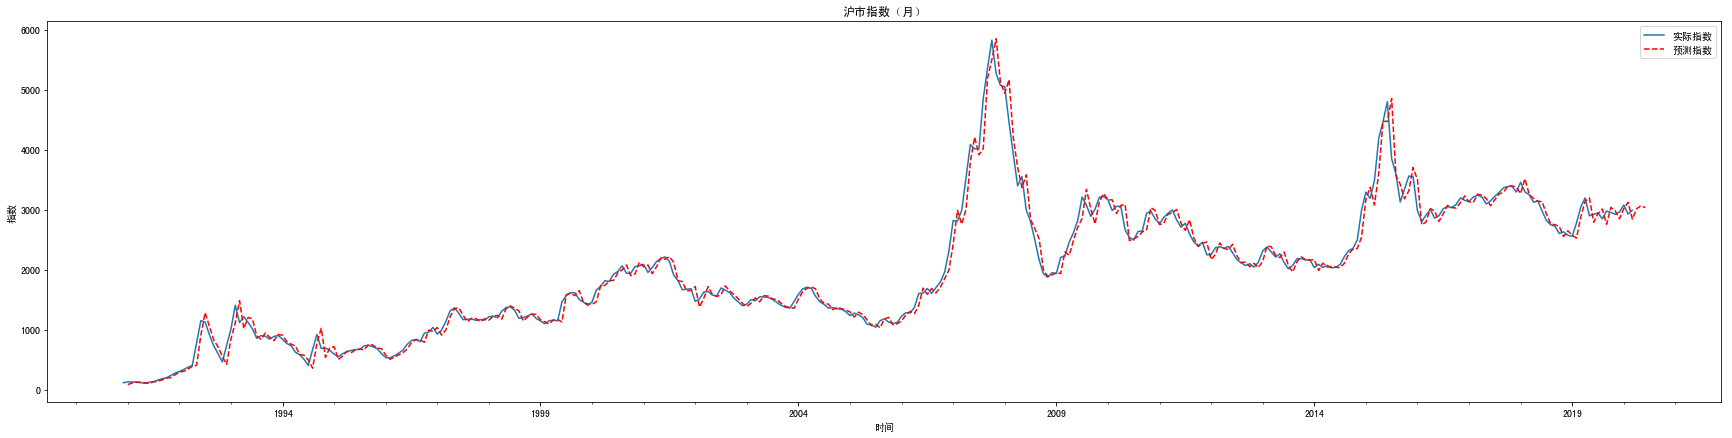

In [34]:
# 步骤1：设置future_month，需要预测的时间date_list
future_month = 3
last_month = pd.to_datetime(df_M.index[len(df_M)-1])  # 2020-03-31 00:00:00
date_list = []

for i in range(future_month):
    # 计算下个月有多少天
    year = last_month.year     # 2020
    month = last_month.month   # 3
    if month == 12:
        month = 1
        year = year + 1
    else:
        month = month + 1
    next_month_days = calendar.monthrange(year, month)[1]   # 30  31  30
    last_month = last_month + timedelta(days=next_month_days) # 2020-04-30 00:00:00  2020-05-31 00:00:00  2020-06-30 00:00:00
    date_list.append(last_month)
# print('date_list=', date_list)
# date_list= [Timestamp('2020-04-30 00:00:00', freq='M'), 
#             Timestamp('2020-05-31 00:00:00', freq='M'), 
#             Timestamp('2020-06-30 00:00:00', freq='M')]



# 步骤2：添加未来要预测的3个月
future = pd.DataFrame(index=date_list, columns= df_M.columns)
df_M = pd.concat([df_M, future])
# 从最早日期 1990-12-19 到现在
df_M['forecast'] = best_model.predict(start=0, end=len(df_M))
# df_M['forecast'] = best_model.get_prediction(start=0, end=len(df_M)).predicted_mean # get_prediction得到的是区间，使用predicted_mean
# 第一个元素不正确，设置为NaN
df_M['forecast'][0] = np.NaN
print(df_M)

# 步骤3：沪市指数预测结果显示
plt.figure(figsize=(30,7))
df_M['Price'].plot(label='实际指数')
df_M['forecast'].plot(color='r', ls='--', label='预测指数')
plt.legend()
plt.title('沪市指数（月）')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()

## 代码实现（LSTM模型）

[[  99.98    104.39    109.13    114.55    120.25    125.27  ]
 [ 104.39    109.13    114.55    120.25    125.27    125.28  ]
 [ 109.13    114.55    120.25    125.27    125.28    126.45  ]
 ...
 [2992.8968 3011.6657 3071.6771 3034.5113 2943.2907 2996.7618]
 [3011.6657 3071.6771 3034.5113 2943.2907 2996.7618 2968.5174]
 [3071.6771 3034.5113 2943.2907 2996.7618 2968.5174 2923.4856]]
(7140, 6)
Epoch 1/500
 - 10s - loss: 4932270.3079
Epoch 2/500
 - 5s - loss: 4892776.6623
Epoch 3/500
 - 4s - loss: 4859697.8855
Epoch 4/500
 - 5s - loss: 4827781.3597
Epoch 5/500
 - 5s - loss: 4796096.0359
Epoch 6/500
 - 5s - loss: 4765331.9999
Epoch 7/500
 - 7s - loss: 4734782.2747
Epoch 8/500
 - 7s - loss: 4703713.5119
Epoch 9/500
 - 7s - loss: 4673766.1044
Epoch 10/500
 - 7s - loss: 4644360.4568
Epoch 11/500
 - 6s - loss: 4614051.3815
Epoch 12/500
 - 6s - loss: 4585661.3334
Epoch 13/500
 - 7s - loss: 4555804.3998
Epoch 14/500
 - 6s - loss: 4526517.7725
Epoch 15/500
 - 6s - loss: 4497976.7622
Epoch 16/500
 

Epoch 194/500
 - 5s - loss: 1617030.0776
Epoch 195/500
 - 4s - loss: 1609055.6081
Epoch 196/500
 - 4s - loss: 1597350.0535
Epoch 197/500
 - 4s - loss: 1595575.0841
Epoch 198/500
 - 5s - loss: 1586760.8927
Epoch 199/500
 - 4s - loss: 1578383.4272
Epoch 200/500
 - 4s - loss: 1571959.5395
Epoch 201/500
 - 6s - loss: 1569436.9922
Epoch 202/500
 - 6s - loss: 1568049.1296
Epoch 203/500
 - 5s - loss: 1555911.1080
Epoch 204/500
 - 5s - loss: 1560347.5301
Epoch 205/500
 - 6s - loss: 1551219.8668
Epoch 206/500
 - 6s - loss: 1537439.1765
Epoch 207/500
 - 6s - loss: 1542114.1954
Epoch 208/500
 - 6s - loss: 1530271.9909
Epoch 209/500
 - 6s - loss: 1527955.3935
Epoch 210/500
 - 8s - loss: 1518517.9586
Epoch 211/500
 - 7s - loss: 1515763.7261
Epoch 212/500
 - 6s - loss: 1504359.9213
Epoch 213/500
 - 5s - loss: 1511667.5615
Epoch 214/500
 - 6s - loss: 1499117.3628
Epoch 215/500
 - 6s - loss: 1499261.2646
Epoch 216/500
 - 6s - loss: 1490265.9405
Epoch 217/500
 - 6s - loss: 1489041.2276
Epoch 218/500
 -

Epoch 394/500
 - 8s - loss: 1216386.6499
Epoch 395/500
 - 6s - loss: 1208700.3099
Epoch 396/500
 - 5s - loss: 1207621.0110
Epoch 397/500
 - 5s - loss: 1216148.1329
Epoch 398/500
 - 5s - loss: 1207084.4954
Epoch 399/500
 - 4s - loss: 1212940.4632
Epoch 400/500
 - 4s - loss: 1210564.3786
Epoch 401/500
 - 4s - loss: 1213324.3403
Epoch 402/500
 - 4s - loss: 1211277.5095
Epoch 403/500
 - 4s - loss: 1216744.2632
Epoch 404/500
 - 4s - loss: 1211498.2608
Epoch 405/500
 - 4s - loss: 1201417.5520
Epoch 406/500
 - 4s - loss: 1207531.9567
Epoch 407/500
 - 4s - loss: 1204474.7106
Epoch 408/500
 - 5s - loss: 1207100.6246
Epoch 409/500
 - 5s - loss: 1198973.5582
Epoch 410/500
 - 5s - loss: 1200872.2075
Epoch 411/500
 - 5s - loss: 1205935.3712
Epoch 412/500
 - 5s - loss: 1205588.7377
Epoch 413/500
 - 6s - loss: 1200864.0774
Epoch 414/500
 - 5s - loss: 1204821.7337
Epoch 415/500
 - 5s - loss: 1204047.6509
Epoch 416/500
 - 5s - loss: 1204150.3668
Epoch 417/500
 - 5s - loss: 1200687.4357
Epoch 418/500
 -

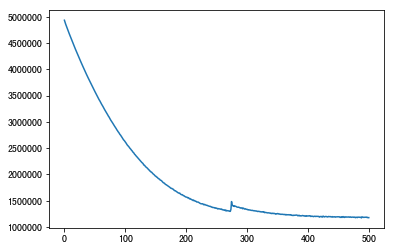

No handles with labels found to put in legend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 128)            66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 198,531
Trainable params: 198,531
Non-trainable params: 0
_________________________________________________________________
None


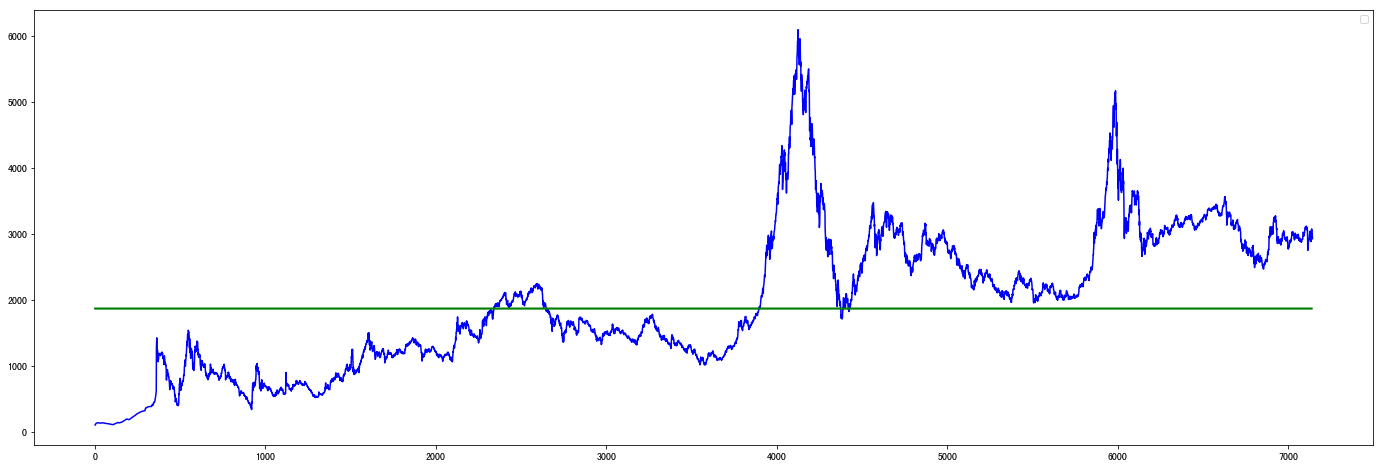

In [36]:
# 使用LSTM预测沪市指数
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pandas import DataFrame
from pandas import concat
from itertools import chain
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# 转化为可以用于监督学习的数据
def get_train_set(data_set, timesteps_in, timesteps_out=1):
    train_data_set = np.array(data_set)
    reframed_train_data_set = np.array(series_to_supervised(train_data_set, timesteps_in, timesteps_out).values)
    print(reframed_train_data_set)
    print(reframed_train_data_set.shape)
    train_x, train_y = reframed_train_data_set[:, :-timesteps_out], reframed_train_data_set[:, -timesteps_out:]
    # 将数据集重构为符合LSTM要求的数据格式,即 [样本数，时间步，特征]
    train_x = train_x.reshape((train_x.shape[0], timesteps_in, 1))
    return train_x, train_y

"""
将时间序列数据转换为适用于监督学习的数据
给定输入、输出序列的长度
data: 观察序列
n_in: 观测数据input(X)的步长，范围[1, len(data)], 默认为1
n_out: 观测数据output(y)的步长， 范围为[0, len(data)-1], 默认为1
dropnan: 是否删除NaN行
返回值：适用于监督学习的 DataFrame
"""
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 预测序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # 拼接到一起
    agg = concat(cols, axis=1)
    agg.columns = names
    # 去掉NaN行
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# 使用LSTM进行预测
def lstm_model(source_data_set, train_x, label_y, input_epochs, input_batch_size, timesteps_out):
    model = Sequential()
    
    # 第一层, 隐藏层神经元节点个数为128, 返回整个序列
    model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=(train_x.shape[1], train_x.shape[2])))
    # 第二层，隐藏层神经元节点个数为128, 只返回序列最后一个输出
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    # 第三层 因为是回归问题所以使用linear
    model.add(Dense(timesteps_out, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # LSTM训练 input_epochs次数
    res = model.fit(train_x, label_y, epochs=input_epochs, batch_size=input_batch_size, verbose=2, shuffle=False)

    # 模型预测
    train_predict = model.predict(train_x)
    #test_data_list = list(chain(*test_data))
    train_predict_list = list(chain(*train_predict))

    plt.plot(res.history['loss'], label='train')
    plt.show()
    print(model.summary())
    plot_img(source_data_set, train_predict)

# 呈现原始数据，训练结果，验证结果，预测结果
def plot_img(source_data_set, train_predict):
    plt.figure(figsize=(24, 8))
    # 原始数据蓝色
    plt.plot(source_data_set[:, -1], c='b')
    # 训练数据绿色
    plt.plot([x for x in train_predict], c='g')
    plt.legend()
    plt.show()

# 设置观测数据input(X)的步长（时间步），epochs，batch_size
timesteps_in = 3
timesteps_out = 3
epochs = 500
batch_size = 100
data = pd.read_csv('dataset/shanghai_index_1990_12_19_to_2020_03_12.csv')
data_set = data[['Price']].values.astype('float64')
# 转化为可以用于监督学习的数据
train_x, label_y = get_train_set(data_set, timesteps_in=timesteps_in, timesteps_out=timesteps_out)

# 使用LSTM进行训练、预测
lstm_model(data_set, train_x, label_y, epochs, batch_size, timesteps_out=timesteps_out)

笔记：
- 获取DataFrame数据中的某一列：data.Price等价于data['Price']（两种写法等价）
- DataFrame：二维标记数据结构，列可以是不同的数据类型，是最常用的pandas对象，如同Series对象一样接受多种输入：lists/dicts/Series/DataFrame。

问题：
- 数据分解seasonal_decompose：返回三个部分 trend（趋势），seasonal（季节性）和residual (残留)
result = sm.tsa.seasonal_decompose(data['Price'], freq=288)为何只能分解出3个图？周期性的图为什么没有？
- result = sm.tsa.seasonal_decompose(data['Price'], freq=288)每一个年份的交易日并不都是恒定不变的，有些年份只有255个数据，有些年份只有243个数据，如何定义freq？取成288不会有影响吗？